# Import Modules

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from html import unescape
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras import layers, models
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# Data Reading

In [2]:
reviews_df = pd.read_csv('https://raw.githubusercontent.com/selvinfurtado01/schulich_data_science/refs/heads/main/Recipe%20Reviews%20and%20User%20Feedback%20Dataset.csv')

In [3]:
reviews_df.head(10)

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...
5,5,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2Do918IutExN0pWEOFMU4cbiT8v,u_BALTQJIvWtYr,nikhita,1,1661354351,0,3,1,5,518,amazing! my boyfriend loved it so much! going ...
6,6,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_24hhcbywpsgGqG7yeDFH1IPZCb8,u_HuJVXMzQqJoI,Sandy1256,1,1644088805,0,11,0,5,833,Wow!!! This recipe is excellent as written!! ...
7,7,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_24cuIEu6UoJvd5VRMAoqnTPR9wd,u_uj79hCc4xVhm,Towanka,1,1643942114,0,28,2,0,891,This is delicious and I make it often. One suc...
8,8,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_24cc4VZR87RR5vdkYAnsnq6YaOS,u_xDTU4BqIVIc9,Quest,1,1643933124,0,6,0,5,693,I absolutely love this recipe. I&#39;ve tweake...
9,9,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_24Fso1ApihQ91uCmNvhBDDO1k2P,u_cDoX9ujcQEoc,Susannah953,1,1643237839,0,0,0,5,404,I make this a lot … my kids and there friends ...


In [4]:
reviews_df.describe()

,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18182.000000,18182.000000,18182.000000,18182.000000,1.818200e+04,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,121.465295,38.689363,21773.667253,2.159608,1.623710e+09,0.014630,1.089264,0.549335,4.288802,153.162138
std,116.747893,29.786647,23965.109637,10.014666,5.468697e+06,0.137974,4.201004,3.470124,1.544786,141.075316
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,150.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,520.000000,1.665756e+09,3.000000,106.000000,126.000000,5.000000,946.000000


In [5]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB


# Data Cleaning

In [6]:
reviews_df.isna().sum()

Unnamed: 0         0
recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               2
dtype: int64

In [7]:
reviews_df[reviews_df['text'].isna() == True]

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
1507,344,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_260955,u_1oKZmfyycO3xVnQeffIKHuaKT2U,No.1FamilyBaker,1,1622717645,0,0,0,5,100,NaN
2722,299,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_260817,u_1oKXz42APTrXTFF6SGvR3YMBJGy,TRGriggs,1,1622717652,0,0,0,5,100,NaN


In [8]:
reviews_df.dropna(inplace = True)

In [9]:
reviews_df.isna().sum()

Unnamed: 0         0
recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               0
dtype: int64

In [10]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18180 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18180 non-null  int64 
 1   recipe_number    18180 non-null  int64 
 2   recipe_code      18180 non-null  int64 
 3   recipe_name      18180 non-null  object
 4   comment_id       18180 non-null  object
 5   user_id          18180 non-null  object
 6   user_name        18180 non-null  object
 7   user_reputation  18180 non-null  int64 
 8   created_at       18180 non-null  int64 
 9   reply_count      18180 non-null  int64 
 10  thumbs_up        18180 non-null  int64 
 11  thumbs_down      18180 non-null  int64 
 12  stars            18180 non-null  int64 
 13  best_score       18180 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.2+ MB


In [11]:
reviews_df['created_at']

0        1665619889
1        1665277687
2        1664404557
3        1661787808
4        1664913823
            ...    
18177    1622717977
18178    1613036720
18179    1622717844
18180    1622717233
18181    1622717625
Name: created_at, Length: 18180, dtype: int64

In [12]:
date_format = '%d%M%Y'
reviews_df['created_at'] = pd.to_datetime(reviews_df['created_at'], unit='s').dt.strftime('%d-%m-%Y')

In [13]:
reviews_df['created_at']

0        13-10-2022
1        09-10-2022
2        28-09-2022
3        29-08-2022
4        04-10-2022
            ...    
18177    03-06-2021
18178    11-02-2021
18179    03-06-2021
18180    03-06-2021
18181    03-06-2021
Name: created_at, Length: 18180, dtype: object

In [14]:
reviews_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [15]:
reviews_df.head(10)

,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,13-10-2022,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,09-10-2022,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,28-09-2022,0,3,0,5,710,I have a very complicated white chicken chili ...
3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,29-08-2022,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,04-10-2022,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...
5,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2Do918IutExN0pWEOFMU4cbiT8v,u_BALTQJIvWtYr,nikhita,1,24-08-2022,0,3,1,5,518,amazing! my boyfriend loved it so much! going ...
6,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_24hhcbywpsgGqG7yeDFH1IPZCb8,u_HuJVXMzQqJoI,Sandy1256,1,05-02-2022,0,11,0,5,833,Wow!!! This recipe is excellent as written!! ...
7,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_24cuIEu6UoJvd5VRMAoqnTPR9wd,u_uj79hCc4xVhm,Towanka,1,04-02-2022,0,28,2,0,891,This is delicious and I make it often. One suc...
8,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_24cc4VZR87RR5vdkYAnsnq6YaOS,u_xDTU4BqIVIc9,Quest,1,04-02-2022,0,6,0,5,693,I absolutely love this recipe. I&#39;ve tweake...
9,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_24Fso1ApihQ91uCmNvhBDDO1k2P,u_cDoX9ujcQEoc,Susannah953,1,26-01-2022,0,0,0,5,404,I make this a lot … my kids and there friends ...


In [16]:
reviews_df['stars'].value_counts()

stars
5    13827
0     1696
4     1655
3      490
1      280
2      232
Name: count, dtype: int64

In [17]:
reviews_df.describe()

,recipe_number,recipe_code,user_reputation,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18180.000000,18180.000000,18180.000000,18180.000000,18180.000000,18180.000000,18180.000000,18180.000000
mean,38.693124,21774.727283,2.159736,0.014631,1.089384,0.549395,4.288724,153.167987
std,29.786123,23966.015985,10.015210,0.137981,4.201219,3.470310,1.544853,141.081974
min,1.000000,386.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,6086.000000,1.000000,0.000000,0.000000,0.000000,5.000000,100.000000
50%,33.000000,14600.000000,1.000000,0.000000,0.000000,0.000000,5.000000,100.000000
75%,64.000000,33121.000000,1.000000,0.000000,0.000000,0.000000,5.000000,100.000000
max,100.000000,191775.000000,520.000000,3.000000,106.000000,126.000000,5.000000,946.000000


In [18]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18180 entries, 0 to 18181
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   recipe_number    18180 non-null  int64 
 1   recipe_code      18180 non-null  int64 
 2   recipe_name      18180 non-null  object
 3   comment_id       18180 non-null  object
 4   user_id          18180 non-null  object
 5   user_name        18180 non-null  object
 6   user_reputation  18180 non-null  int64 
 7   created_at       18180 non-null  object
 8   reply_count      18180 non-null  int64 
 9   thumbs_up        18180 non-null  int64 
 10  thumbs_down      18180 non-null  int64 
 11  stars            18180 non-null  int64 
 12  best_score       18180 non-null  int64 
 13  text             18180 non-null  object
dtypes: int64(8), object(6)
memory usage: 2.1+ MB


# Data PreProcessing

In [19]:
# Decode HTML entities
reviews_df['text'] = reviews_df['text'].apply(unescape)

In [20]:
# Removing Stopwords
stop_words = set(stopwords.words('english'))
reviews_df['text'] = reviews_df['text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [21]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
reviews_df['text'] = reviews_df['text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))

In [22]:
# Convert to lowercase
reviews_df['text'] = reviews_df['text'].str.lower()  

In [23]:
# Remove punctuations
reviews_df['text'] = reviews_df['text'].str.replace(r'[^\w\s]', '', regex=True)

In [24]:
reviews_df[['recipe_number', 'recipe_name', 'text', 'stars']]

,recipe_number,recipe_name,text,stars
0,1,Creamy White Chili,i tweaked little removed onion onion hater hou...,5
1,1,Creamy White Chili,bush used white chili bean made recipe super s...,5
2,1,Creamy White Chili,i complicated white chicken chili recipe i mad...,5
3,1,Creamy White Chili,in introduction mentioned cream cheese none li...,0
4,1,Creamy White Chili,wonderful i made chilistew night dinner church...,0
...,...,...,...,...
18177,100,Mamaw Emily’s Strawberry Cake,this strawberry cake family favorite since 196...,5
18178,100,Mamaw Emily’s Strawberry Cake,pi received endless compliment cake i used fir...,5
18179,100,Mamaw Emily’s Strawberry Cake,this cake delicious moist i need sugar called ...,5
18180,100,Mamaw Emily’s Strawberry Cake,i made too it wonderful as frosting i wish i m...,5


In [25]:
reviews_df[reviews_df['stars'] == 2][['recipe_number', 'recipe_name', 'text', 'stars']]

,recipe_number,recipe_name,text,stars
108,1,Creamy White Chili,so recipe its like soup hearty chili the recip...,2
130,1,Creamy White Chili,good one,2
670,2,Best Ever Banana Bread,i excited try recipe followed letter bread ris...,2
734,2,Best Ever Banana Bread,just okay its average banana bread,2
794,2,Best Ever Banana Bread,i hard time calling best ever it took 30 min l...,2
...,...,...,...,...
18026,99,Egg Roll Noodle Bowl,really needed sauce i added half jar orange sa...,2
18072,100,Mamaw Emily’s Strawberry Cake,a bit rich taste if i make again i think i wou...,2
18095,100,Mamaw Emily’s Strawberry Cake,i wanted so much love cake the strawberry smel...,2
18122,100,Mamaw Emily’s Strawberry Cake,im definitely minority rating i used 8 inch ca...,2


In [26]:
texts = reviews_df['text'].values
labels = reviews_df['stars'].values

In [27]:
# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [28]:
# Get the indices of each class
index_5 = reviews_df[reviews_df['stars'] == 5].index
index_0 = reviews_df[reviews_df['stars'] == 0].index
index_4 = reviews_df[reviews_df['stars'] == 4].index
index_3 = reviews_df[reviews_df['stars'] == 3].index
index_1 = reviews_df[reviews_df['stars'] == 1].index
index_2 = reviews_df[reviews_df['stars'] == 2].index

In [29]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [30]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

In [31]:
reviews_df['stars'].value_counts()

stars
5    13827
0     1696
4     1655
3      490
1      280
2      232
Name: count, dtype: int64

In [32]:
# Adjusted sampling strategy
under_sampling_strat = {
    5: reviews_df['stars'].value_counts()[5] // 2    
}

over_sampling_strat = {
    0: int(reviews_df['stars'].value_counts()[0] * 1.25), 
    1: int(reviews_df['stars'].value_counts()[1] * 3),
    2: int(reviews_df['stars'].value_counts()[2] * 4),
    3: int(reviews_df['stars'].value_counts()[3] * 2),
    4: int(reviews_df['stars'].value_counts()[4] * 1.25),
}

In [33]:
# # Oversampling using SMOTE
# smote = SMOTE(sampling_strategy = sampling_strategy, random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pad, y_train)

In [34]:
train_index_5 = np.where(y_train == 5)[0]
train_index_0 = np.where(y_train == 0)[0]
train_index_4 = np.where(y_train == 4)[0]
train_index_3 = np.where(y_train == 3)[0]
train_index_1 = np.where(y_train == 1)[0]
train_index_2 = np.where(y_train == 2)[0]

In [35]:
# Undersampling Majority Class by randoming selecting 80% of data

X_class_5 = X_train_pad[train_index_5]
y_class_5 = y_train[train_index_5]

X_class_5, y_class_5 = shuffle(X_class_5, y_class_5, random_state=42)

num_samples = int(0.80 * len(X_class_5))
X_class_undersampled = X_class_5[:num_samples]
y_class_undersampled = y_class_5[:num_samples]

# undersampler = RandomUnderSampler(sampling_strategy = under_sampling_strat, random_state = 42)
# X_class_5 = X_train_pad[train_index_5]
# y_class_5 = y_train[train_index_5]

# X_train_undersampled, y_train_undersampled  = undersampler.fit_resample(X_class_5, y_class_5)

# X_class_5 = X_train_pad[np.where(y_train == 5)[0]]
# y_class_5 = y_train[np.where(y_train == 5)[0]]

# undersampler = RandomUnderSampler(sampling_strategy=under_sampling_strat, random_state=42)
# X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_class_5, y_class_5)


In [36]:
X_class_0 = X_train_pad[train_index_0]
y_class_0 = y_train[train_index_0]
X_class_1 = X_train_pad[train_index_1]
y_class_1 = y_train[train_index_1]
X_class_2 = X_train_pad[train_index_2]
y_class_2 = y_train[train_index_2]
X_class_3 = X_train_pad[train_index_3]
y_class_3 = y_train[train_index_3]
X_class_4 = X_train_pad[train_index_4]
y_class_4 = y_train[train_index_4]

In [37]:
# Concatenating Data from the 4 minority classes for undersampling
X_train_oversampled = np.concatenate(
    (X_class_0, X_class_1, X_class_2, X_class_3, X_class_4), axis=0)

y_train_oversampled = np.concatenate(
    (y_class_0, y_class_1, y_class_2, y_class_3, y_class_4), axis=0)

In [38]:
# Oversampling Minority Classes
oversampler = RandomOverSampler(sampling_strategy=over_sampling_strat, random_state=42)
X_class_oversampled, y_class_oversampled = oversampler.fit_resample(X_train_oversampled, y_train_oversampled)

In [39]:
# Combine Oversampled and Undersampled Data
X_train_resampled = np.concatenate(
    (X_class_undersampled, X_class_oversampled), axis=0)

y_train_resampled = np.concatenate(
    (y_class_undersampled, y_class_oversampled), axis=0)

In [40]:
# Checking Final distribution of 'stars'
print(pd.Series(y_train_resampled).value_counts())

5    8861
0    2120
4    2068
3     980
2     928
1     840
Name: count, dtype: int64


# Data Modelling

## CNN Model

In [41]:
# Model design
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

class_weights = {0: 1., 1: 3., 2: 6., 3: 2., 4: 1., 5: 1.}

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [42]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
# Train model
history = model.fit(X_train_resampled, y_train_resampled, class_weight = class_weights, validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.6685 - loss: 1.5829 - val_accuracy: 0.0449 - val_loss: 2.2720
Epoch 2/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7057 - loss: 1.1686 - val_accuracy: 0.2161 - val_loss: 1.7250
Epoch 3/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7043 - loss: 1.0605 - val_accuracy: 0.2693 - val_loss: 1.5316
Epoch 4/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.7386 - loss: 0.8993 - val_accuracy: 0.4209 - val_loss: 1.2652
Epoch 5/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7931 - loss: 0.7561 - val_accuracy: 0.5528 - val_loss: 1.0202
Epoch 6/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.8195 - loss: 0.6645 - val_accuracy: 0.7016 - val_loss: 0.7931
Epoch 7/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.8572 - loss: 0.5443 - val_accuracy: 0.7453 - val_loss: 0.6543
Epoch 8/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.8778 - loss: 0.4625 - val_a

## CNN Model Evaluation

In [44]:
# Evaluate model
y_pred = model.predict(X_test_pad)
y_pred_classes = y_pred.argmax(axis=1)

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [45]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.25      0.27       334
           1       0.35      0.37      0.36        51
           2       0.08      0.09      0.08        35
           3       0.26      0.34      0.29       110
           4       0.27      0.19      0.23       356
           5       0.84      0.88      0.86      2750

    accuracy                           0.72      3636
   macro avg       0.35      0.35      0.35      3636
weighted avg       0.70      0.72      0.71      3636



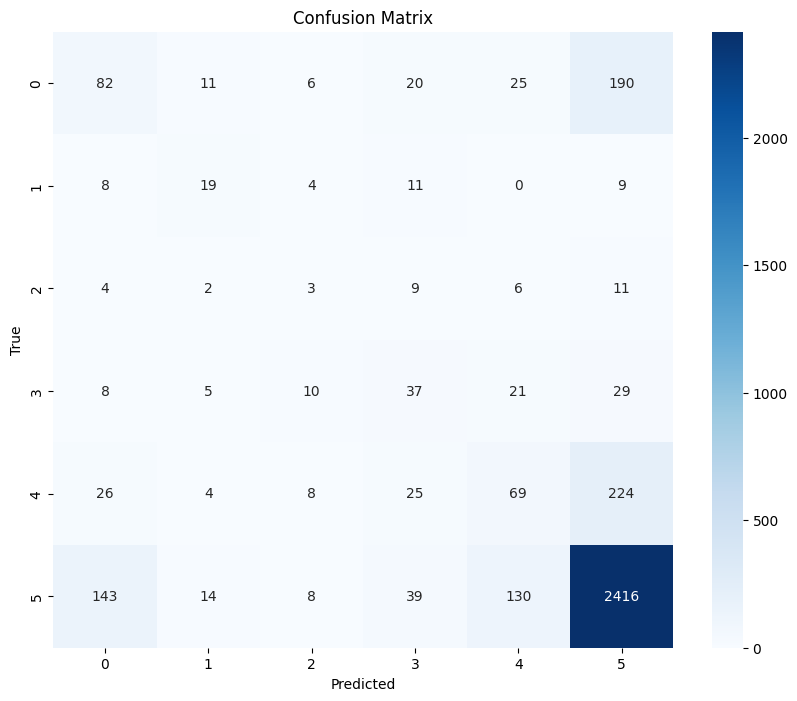

In [46]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [47]:
# Test Accuracy and Loss
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_loss:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7210 - loss: 1.6492
Test Loss: 1.62
Test Accuracy: 0.72


In [48]:
# Plot Test Accuracy and Loss
model_history = history.history

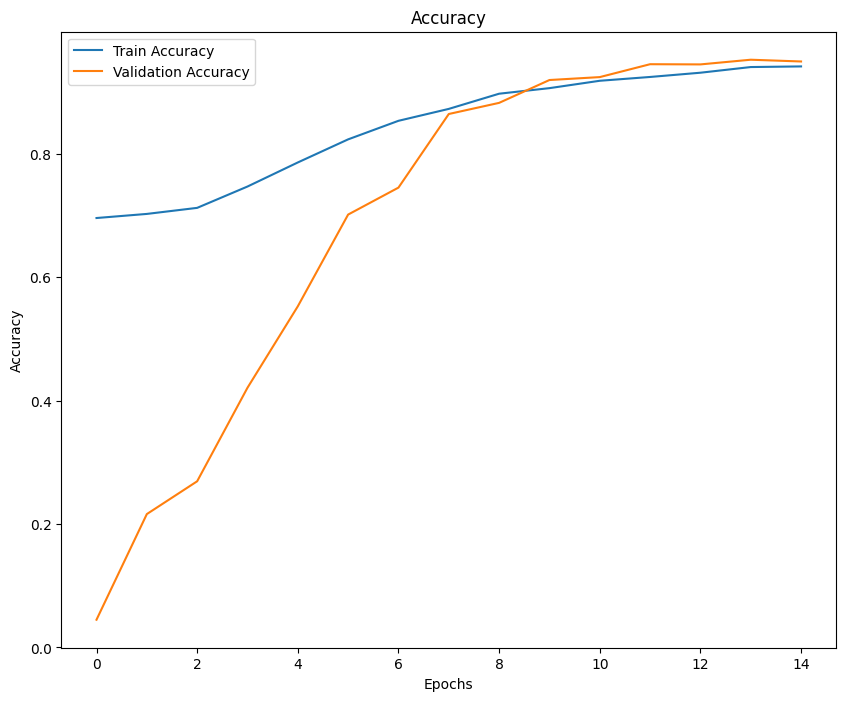

In [49]:
# Accuracy plot
plt.figure(figsize=(10, 8))
plt.plot(model_history.get('accuracy', []), label='Train Accuracy')
plt.plot(model_history.get('val_accuracy', []), label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


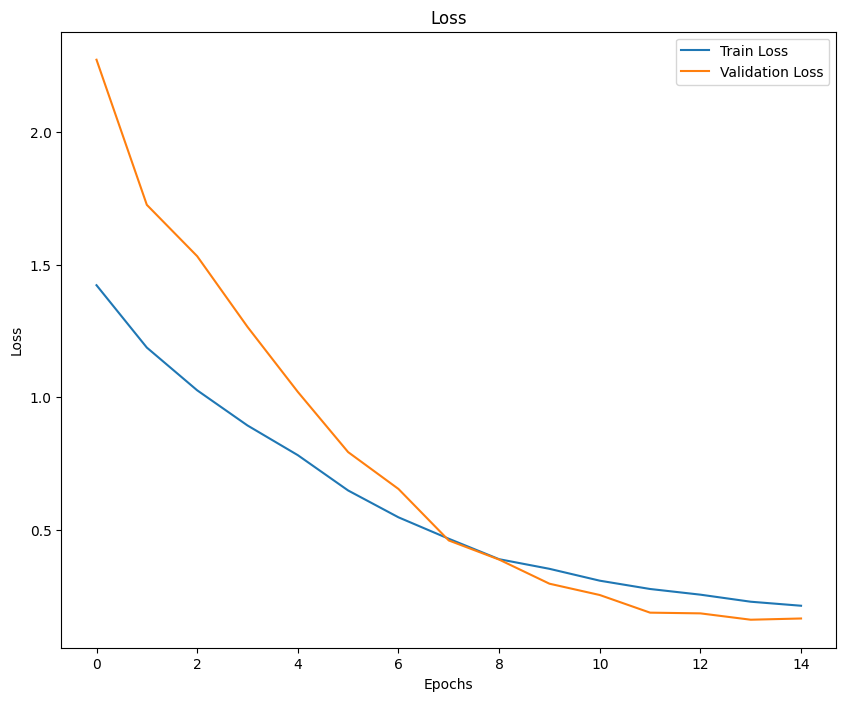

In [50]:
# Loss plot
plt.figure(figsize=(10, 8))
plt.plot(model_history.get('loss', []), label='Train Loss')
plt.plot(model_history.get('val_loss', []), label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## CNN Model with Early Stopping

In [51]:
# Define Model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

class_weights = {0: 1., 1: 3., 2: 6., 3: 2., 4: 1., 5: 1.}

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [52]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
# Early stopping to prevent overfitting
es = EarlyStopping(
    monitor='val_loss',
    mode = 'min',
    patience = 5,
    restore_best_weights = True,
    verbose = 1
)

In [54]:
# Train model with early stopping
history = model.fit(
    X_train_resampled, 
    y_train_resampled, 
    class_weight = class_weights,
    validation_split = 0.2, 
    epochs = 15, 
    batch_size = 32, 
    callbacks = [es]
)

Epoch 1/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.6574 - loss: 1.5668 - val_accuracy: 0.0617 - val_loss: 2.1348
Epoch 2/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7003 - loss: 1.2338 - val_accuracy: 0.2060 - val_loss: 1.8401
Epoch 3/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7151 - loss: 1.0588 - val_accuracy: 0.2465 - val_loss: 1.5722
Epoch 4/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.7356 - loss: 0.8976 - val_accuracy: 0.3614 - val_loss: 1.3796
Epoch 5/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.7734 - loss: 0.8125 - val_accuracy: 0.6079 - val_loss: 1.0592
Epoch 6/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8159 - loss: 0.6598 - val_accuracy: 0.7250 - val_loss: 0.8442
Epoch 7/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8532 - loss: 0.5678 - val_accuracy: 0.7832 - val_loss: 0.7043
Epoch 8/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8694 - loss: 0.4676 - val_

## CNN Model Early Stopping Evaluation

In [55]:
# Evaluate model
y_pred = model.predict(X_test_pad)
y_pred_classes = y_pred.argmax(axis=1)

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [56]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.23      0.27       334
           1       0.37      0.31      0.34        51
           2       0.00      0.00      0.00        35
           3       0.32      0.19      0.24       110
           4       0.28      0.24      0.26       356
           5       0.84      0.90      0.87      2750

    accuracy                           0.73      3636
   macro avg       0.35      0.31      0.33      3636
weighted avg       0.70      0.73      0.72      3636



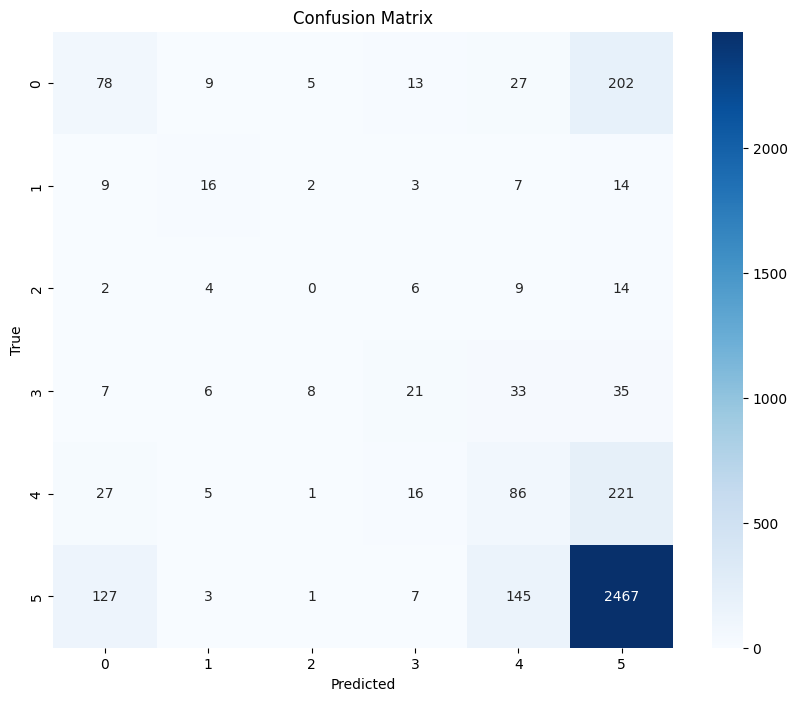

In [57]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [58]:
# Test Accuracy and Loss
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_loss:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7333 - loss: 1.7671
Test Loss: 1.69
Test Accuracy: 0.73


In [59]:
# Plot Model Training and Validation Metrics
model_history = history.history

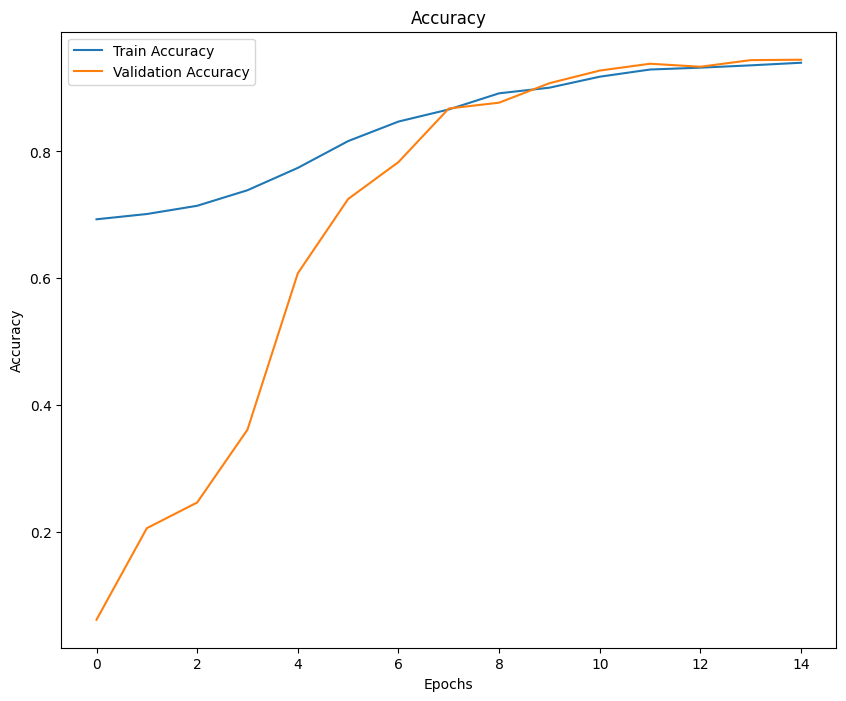

In [60]:
# Accuracy plot
plt.figure(figsize=(10, 8))
plt.plot(model_history.get('accuracy', []), label='Train Accuracy')
plt.plot(model_history.get('val_accuracy', []), label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

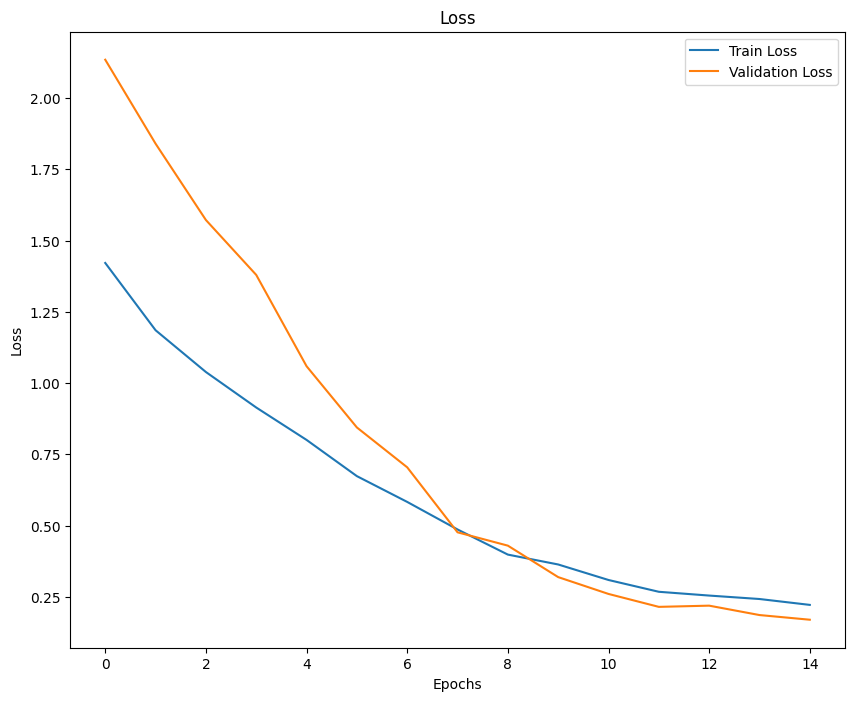

In [61]:
# Loss plot
plt.figure(figsize=(10, 8))
plt.plot(model_history.get('loss', []), label='Train Loss')
plt.plot(model_history.get('val_loss', []), label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## He Uniform Model

In [77]:
from tensorflow.keras.initializers import HeUniform

def he_uniform_model(vocab_size=10000, embedding_dim=128, input_length=100, num_classes=6):
    initializer = HeUniform()

    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
        Conv1D(filters=128, kernel_size=5, activation='relu', kernel_initializer=initializer),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_initializer=initializer),
        Dropout(0.5),
        Dense(num_classes, activation='softmax', kernel_initializer=initializer)
    ])
    
    return model

In [78]:
vocab_size = 10000
embedding_dim = 128
input_length = 100
num_classes = len(label_encoder.classes_)

In [79]:
model_he_uniform = he_uniform_model(vocab_size, embedding_dim, input_length, num_classes)
model_he_uniform.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [80]:
he_history = model_he_uniform.fit(X_train_resampled, y_train_resampled, 
                                class_weight=class_weights, 
                                epochs=15, 
                                batch_size=32, 
                                validation_split=0.2)

Epoch 1/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.6638 - loss: 1.5559 - val_accuracy: 0.0000e+00 - val_loss: 2.1109
Epoch 2/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7037 - loss: 1.2039 - val_accuracy: 0.2149 - val_loss: 1.7372
Epoch 3/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.7111 - loss: 1.0337 - val_accuracy: 0.3301 - val_loss: 1.4531
Epoch 4/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7471 - loss: 0.8857 - val_accuracy: 0.4899 - val_loss: 1.2259
Epoch 5/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7976 - loss: 0.7332 - val_accuracy: 0.6367 - val_loss: 0.9322
Epoch 6/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8277 - loss: 0.6314 - val_accuracy: 0.7649 - val_loss: 0.6986
Epoch 7/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.8690 - loss: 0.5100 - val_accuracy: 0.8329 - val_loss: 0.5470
Epoch 8/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.8807 - loss: 0.436

## He Uniform Model Evaluation

In [81]:
# Evaluate model
y_pred = model_he_uniform.predict(X_test_pad)
y_pred_classes = y_pred.argmax(axis=1)

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [82]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.23      0.27       334
           1       0.47      0.37      0.42        51
           2       0.08      0.06      0.07        35
           3       0.29      0.23      0.26       110
           4       0.27      0.30      0.29       356
           5       0.84      0.88      0.86      2750

    accuracy                           0.73      3636
   macro avg       0.38      0.34      0.36      3636
weighted avg       0.71      0.73      0.72      3636



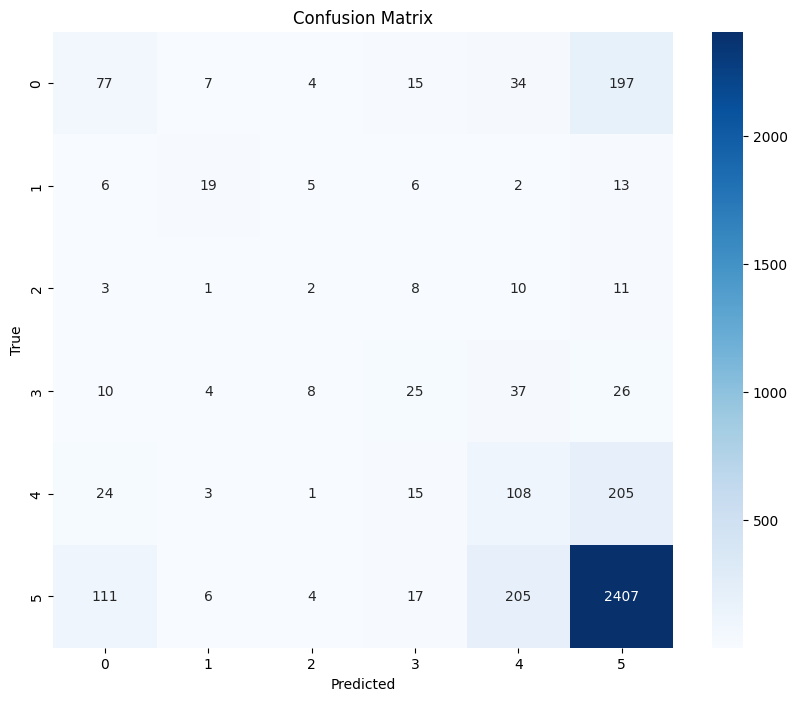

In [83]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [84]:
# Test Accuracy and Loss
test_loss, test_accuracy = model_he_uniform.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_loss:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7197 - loss: 1.5097
Test Loss: 1.46
Test Accuracy: 0.73


In [85]:
# Plot Model Training and Validation Metrics
model_history = he_history.history

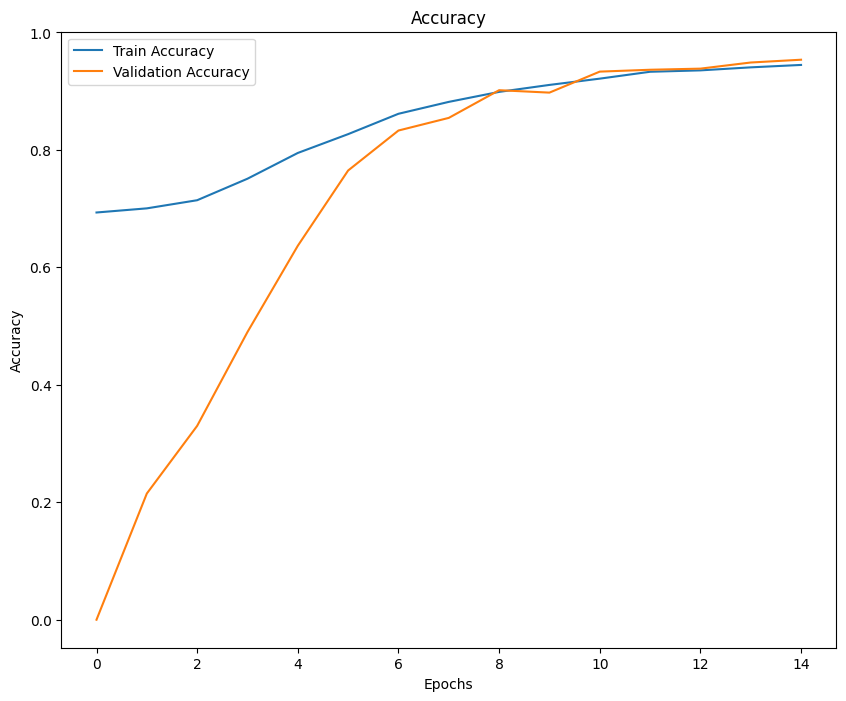

In [87]:
# Accuracy plot
plt.figure(figsize=(10, 8))
plt.plot(model_history.get('accuracy', []), label='Train Accuracy')
plt.plot(model_history.get('val_accuracy', []), label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

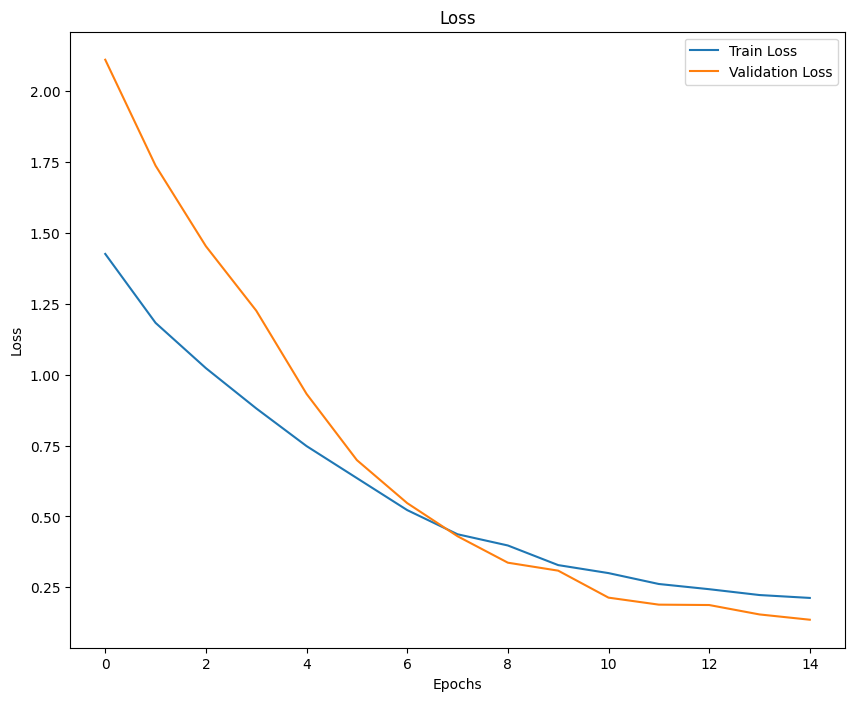

In [88]:
# Loss plot
plt.figure(figsize=(10, 8))
plt.plot(model_history.get('loss', []), label='Train Loss')
plt.plot(model_history.get('val_loss', []), label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## He Uniform Model with Early Stopping

In [92]:
model_he_adam = he_uniform_model(vocab_size, embedding_dim, input_length, num_classes)
model_he_adam.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [93]:
# Early stopping to prevent overfitting
es = EarlyStopping(
    monitor='val_loss',
    mode = 'min',
    patience = 5,
    restore_best_weights = True,
    verbose = 1
)

In [94]:
history_adam = model_he_adam.fit(
    X_train_resampled, 
    y_train_resampled, 
    class_weight = class_weights,
    validation_split = 0.2, 
    epochs = 15, 
    batch_size = 32, 
    callbacks = [es]
)

Epoch 1/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.6630 - loss: 1.5289 - val_accuracy: 0.0506 - val_loss: 2.0081
Epoch 2/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.6980 - loss: 1.2065 - val_accuracy: 0.2149 - val_loss: 1.6693
Epoch 3/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.7182 - loss: 1.0039 - val_accuracy: 0.2820 - val_loss: 1.4257
Epoch 4/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7434 - loss: 0.8769 - val_accuracy: 0.3832 - val_loss: 1.2327
Epoch 5/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7872 - loss: 0.7627 - val_accuracy: 0.5418 - val_loss: 0.9890
Epoch 6/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8352 - loss: 0.6129 - val_accuracy: 0.7285 - val_loss: 0.7640
Epoch 7/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8687 - loss: 0.5149 - val_accuracy: 0.8180 - val_loss: 0.5859
Epoch 8/15
395/395 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8891 - loss: 0.4365 - 

## He Uniform Model Early Stopping Evaluation

In [95]:
# Evaluate model
y_pred = model_he_adam.predict(X_test_pad)
y_pred_classes = y_pred.argmax(axis=1)

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [96]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.21      0.25       334
           1       0.52      0.33      0.40        51
           2       0.03      0.03      0.03        35
           3       0.33      0.22      0.26       110
           4       0.25      0.24      0.25       356
           5       0.83      0.89      0.86      2750

    accuracy                           0.72      3636
   macro avg       0.38      0.32      0.34      3636
weighted avg       0.70      0.72      0.71      3636



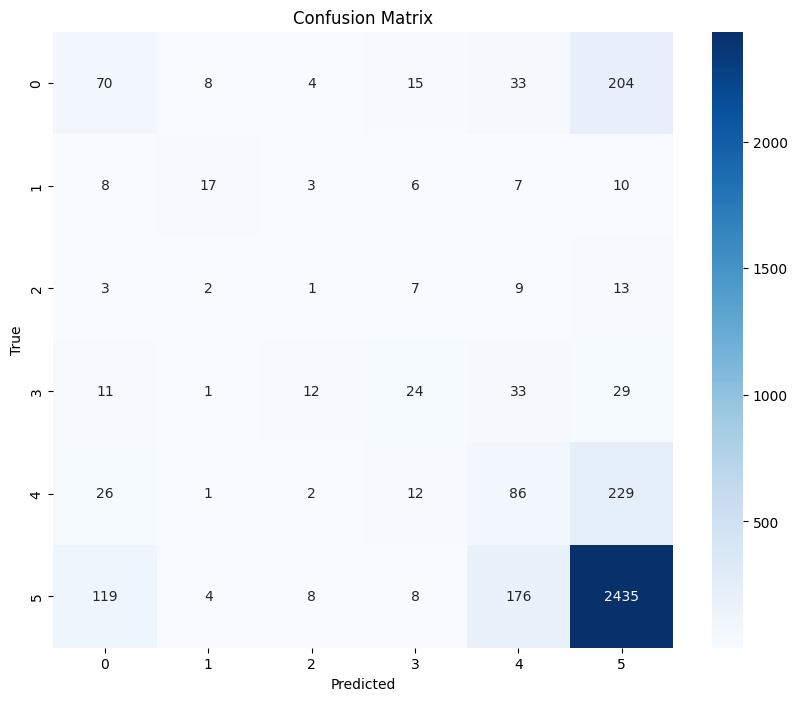

In [97]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [98]:
# Test Accuracy and Loss
test_loss, test_accuracy = model_he_adam.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_loss:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7242 - loss: 1.5775
Test Loss: 1.54
Test Accuracy: 0.72


In [101]:
# Plot Model Training and Validation Metrics
model_history = history_adam.history

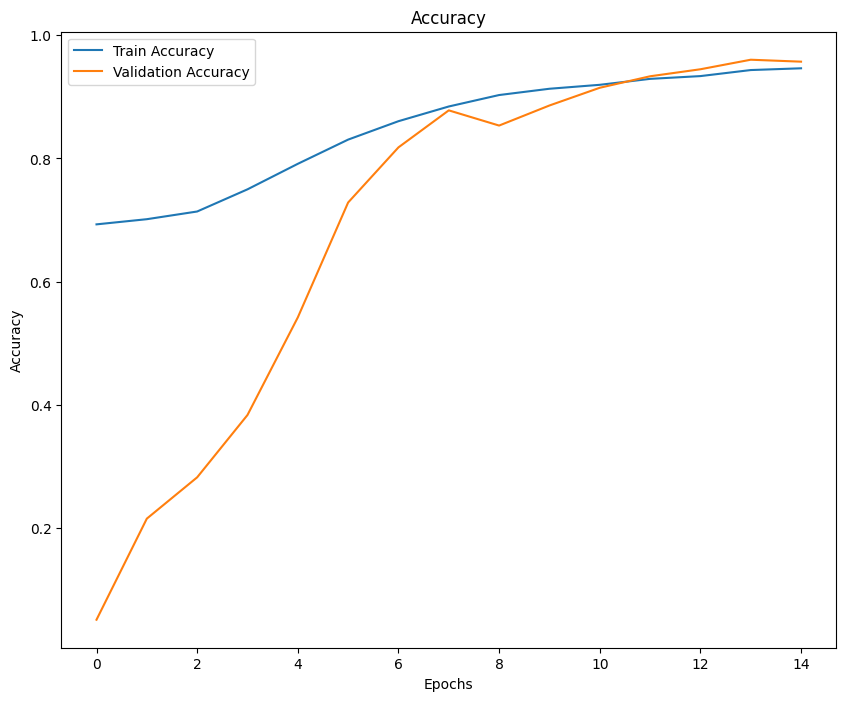

In [102]:
# Accuracy plot
plt.figure(figsize=(10, 8))
plt.plot(model_history.get('accuracy', []), label='Train Accuracy')
plt.plot(model_history.get('val_accuracy', []), label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

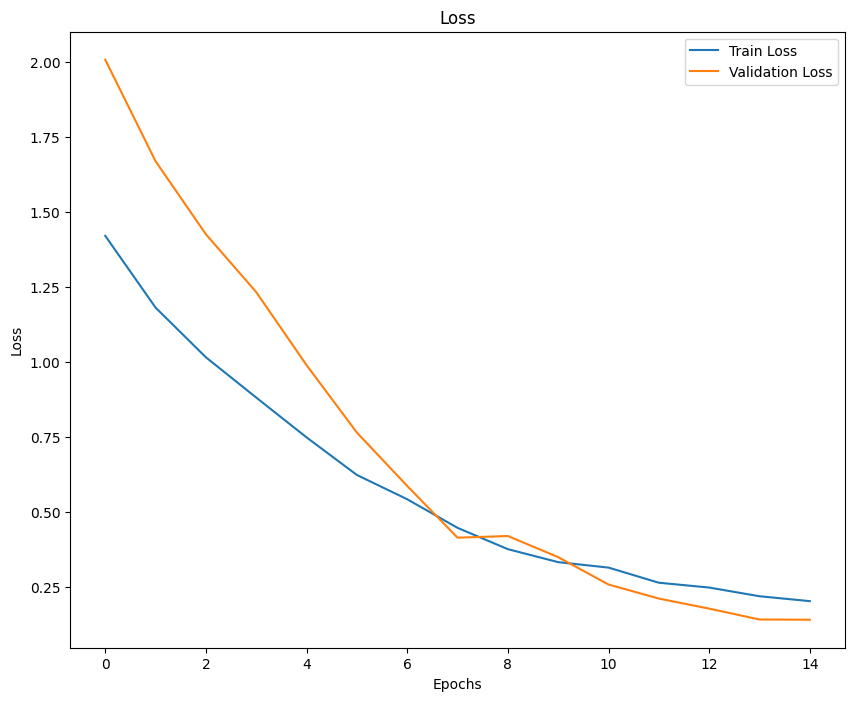

In [103]:
# Loss plot
plt.figure(figsize=(10, 8))
plt.plot(model_history.get('loss', []), label='Train Loss')
plt.plot(model_history.get('val_loss', []), label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()